# Scatterplot

In [1]:
stock_a_ts <- 35.0 + arima.sim(model=list(order=c(0,1,0)), n=100, sd=1.0, mean=0.2)
stock_b_ts <- 28.0 + arima.sim(model=list(order=c(0,1,0)), n=100, sd=2.0, mean=0.4)

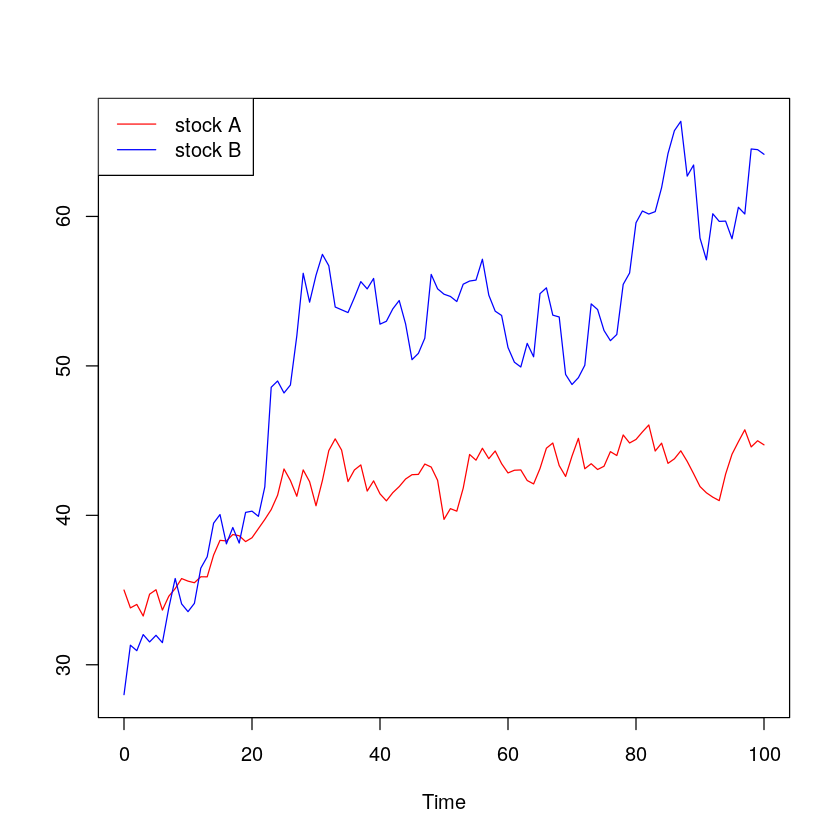

In [2]:
ts.plot(cbind(stock_a_ts, stock_b_ts), col=c('red', 'blue'), lty=1)
legend("topleft", c("stock A","stock B"), lty=1, col=c("red","blue"))

In [3]:
stock_a_array = unclass(stock_a_ts)
stock_b_array = unclass(stock_b_ts)

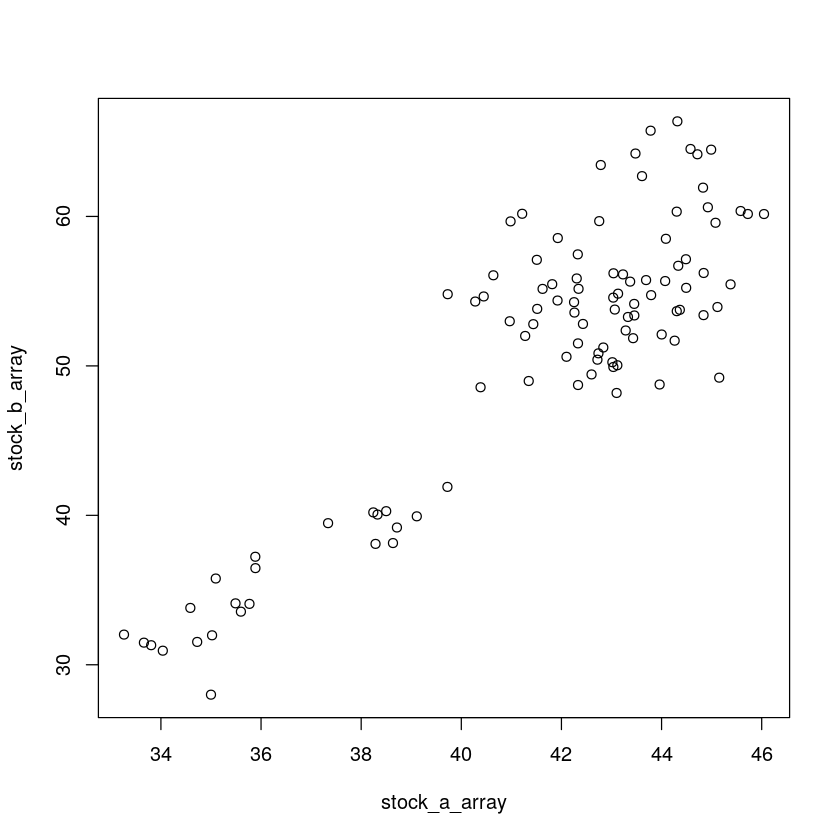

In [4]:
plot(stock_a_array, stock_b_array)

In [5]:
stock_a_logreturn = diff(log(stock_a_array))
stock_b_logreturn = diff(log(stock_b_array))

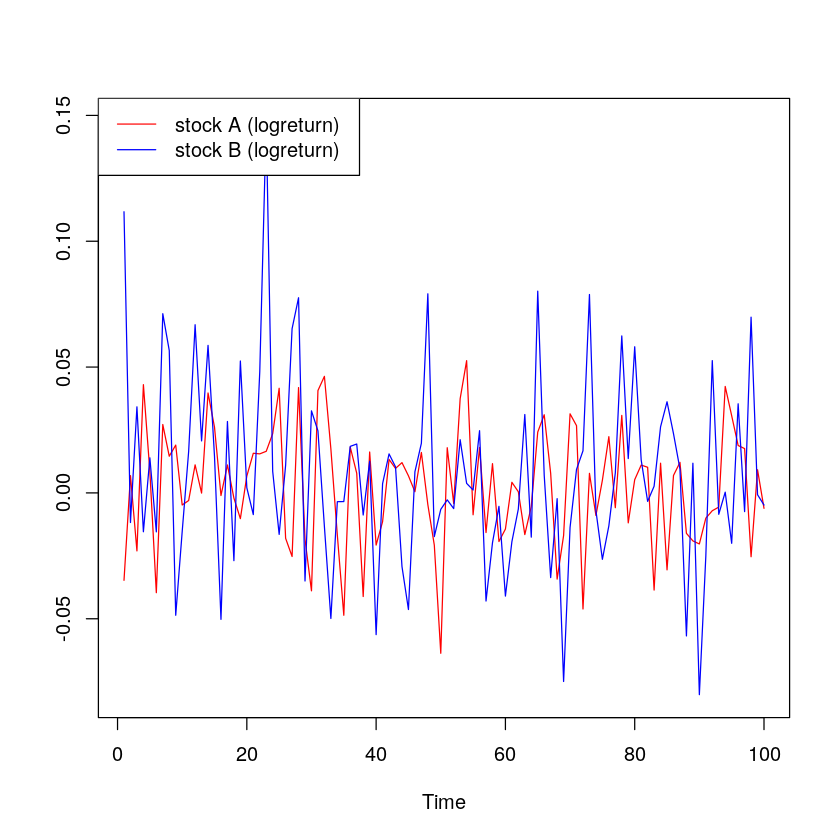

In [6]:
ts.plot(cbind(stock_a_logreturn, stock_b_logreturn), col=c('red', 'blue'), lty=1)
legend("topleft", c("stock A (logreturn)","stock B (logreturn)"), lty=1, col=c("red","blue"))

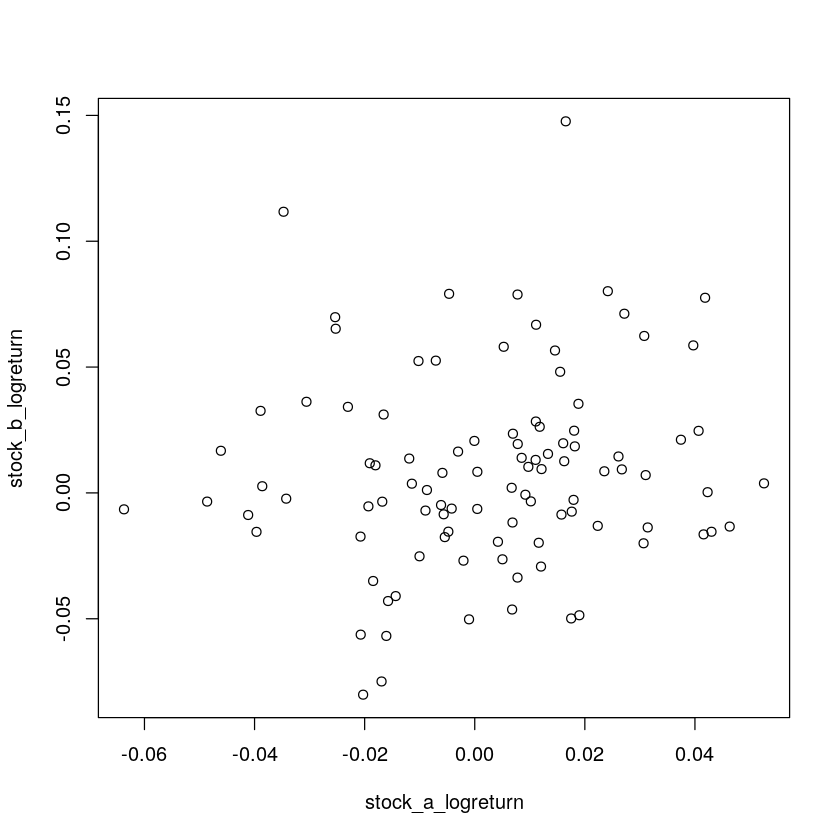

In [7]:
plot(stock_a_logreturn, stock_b_logreturn)

## Practice

In [8]:
eu_stocks <- EuStockMarkets

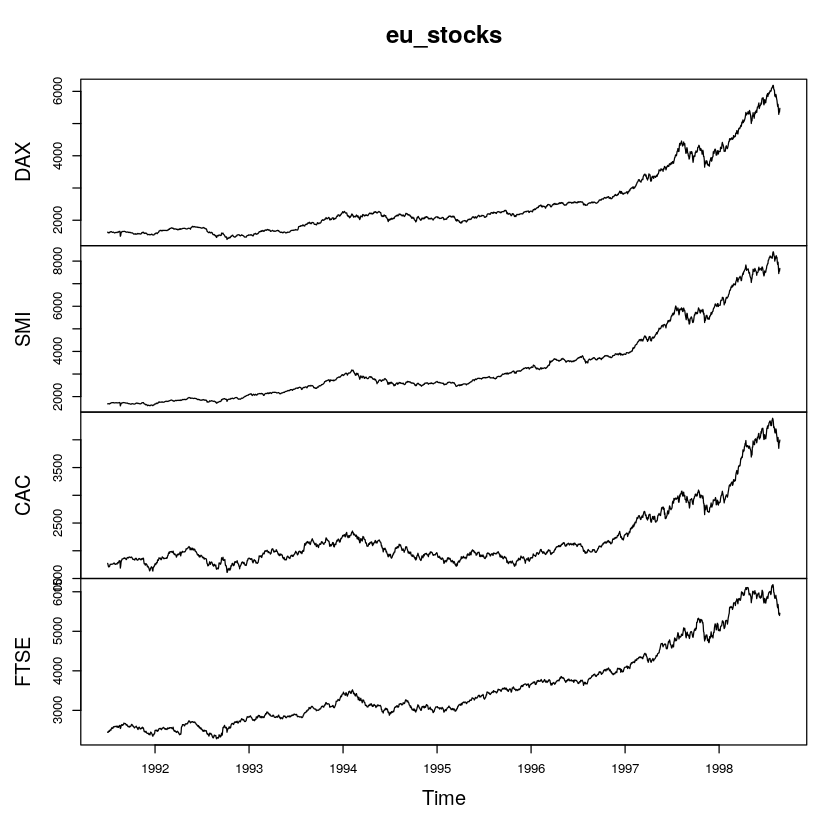

In [9]:
plot(eu_stocks)

In [10]:
frequency(eu_stocks)

[1] 260

In [11]:
deltat(eu_stocks)

[1] 0.003846154

In [12]:
cycle(eu_stocks)

Time Series:
Start = c(1991, 130) 
End = c(1998, 169) 
Frequency = 260 
   [1] 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
  [19] 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
  [37] 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
  [55] 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
  [73] 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
  [91] 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 [109] 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 [127] 256 257 258 259 260   1   2   3   4   5   6   7   8   9  10  11  12  13
 [145]  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
 [163]  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
 [181]  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
 [199]  68  69  70  71  72  73  74  75  76  77  78  79  80 

In [13]:
length(eu_stocks)/1860

[1] 4

In [14]:
head(eu_stocks, n=3)

DAX,SMI,CAC,FTSE
1628.75,1678.1,1772.8,2443.6
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2


In [15]:
tail(eu_stocks, n = 3)

,DAX,SMI,CAC,FTSE
"[1858,]",5386.94,7607.5,3945.7,5462.2
"[1859,]",5355.03,7552.6,3951.7,5399.5
"[1860,]",5473.72,7676.3,3995.0,5455.0


In [16]:
tail(eu_stocks[-1860,], n=3)

,DAX,SMI,CAC,FTSE
"[1857,]",5285.78,7447.9,3846.0,5432.8
"[1858,]",5386.94,7607.5,3945.7,5462.2
"[1859,]",5355.03,7552.6,3951.7,5399.5


In [17]:
head(eu_stocks[-1,], n=3)

DAX,SMI,CAC,FTSE
1613.63,1688.5,1750.5,2460.2
1606.51,1678.6,1718.0,2448.2
1621.04,1684.1,1708.1,2470.4


In [18]:
returns <- eu_stocks[-1,] / eu_stocks[-1860,] - 1

In [19]:
returns <- ts(returns, start = c(1991,130), frequency = 260)

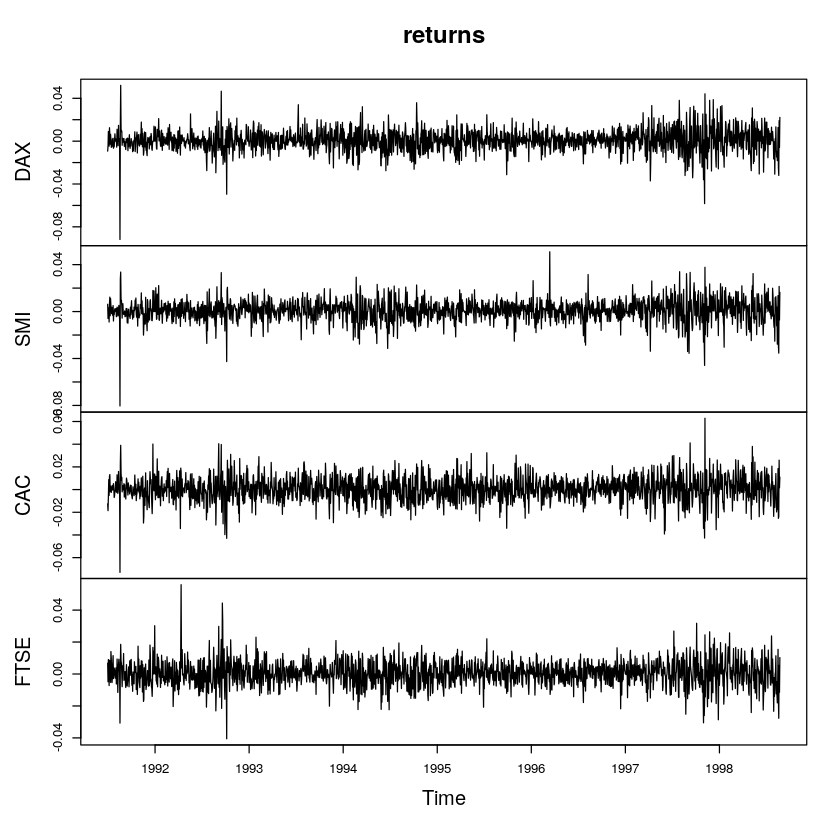

In [20]:
plot(returns)

In [21]:
logreturns <- diff(log(eu_stocks))

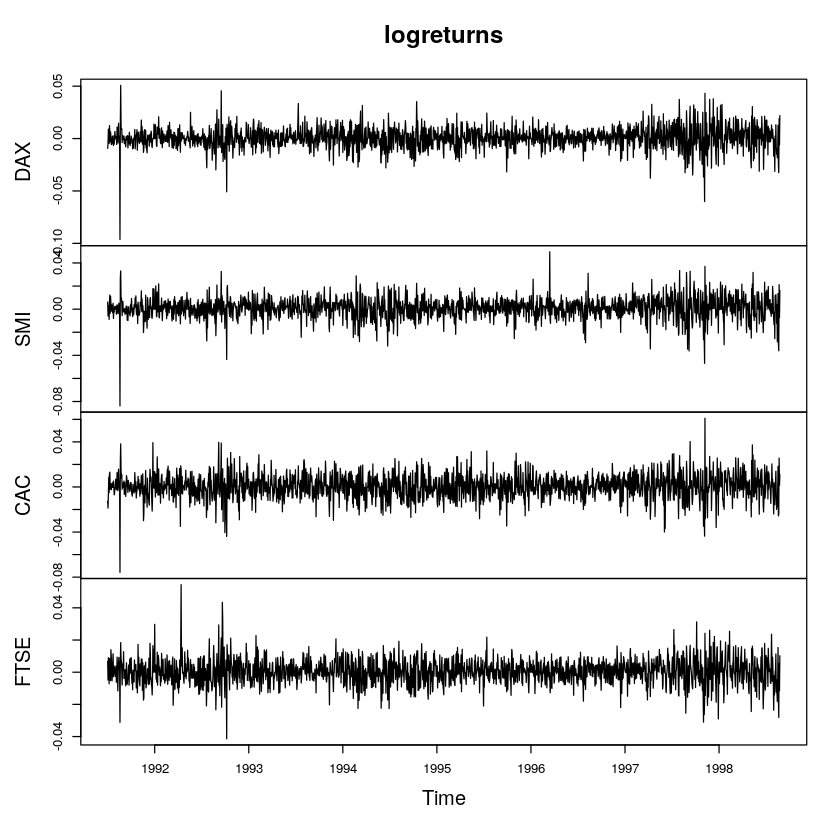

In [22]:
plot(logreturns)

Characteristics of financial time series

In [23]:
nrows <- nrow(eu_stocks)
nrows

[1] 1860

In [24]:
eu_percentreturns <- ts(eu_stocks[2:nrows,] - eu_stocks[1:(nrows-1),])/eu_stocks[1:(nrows-1),]

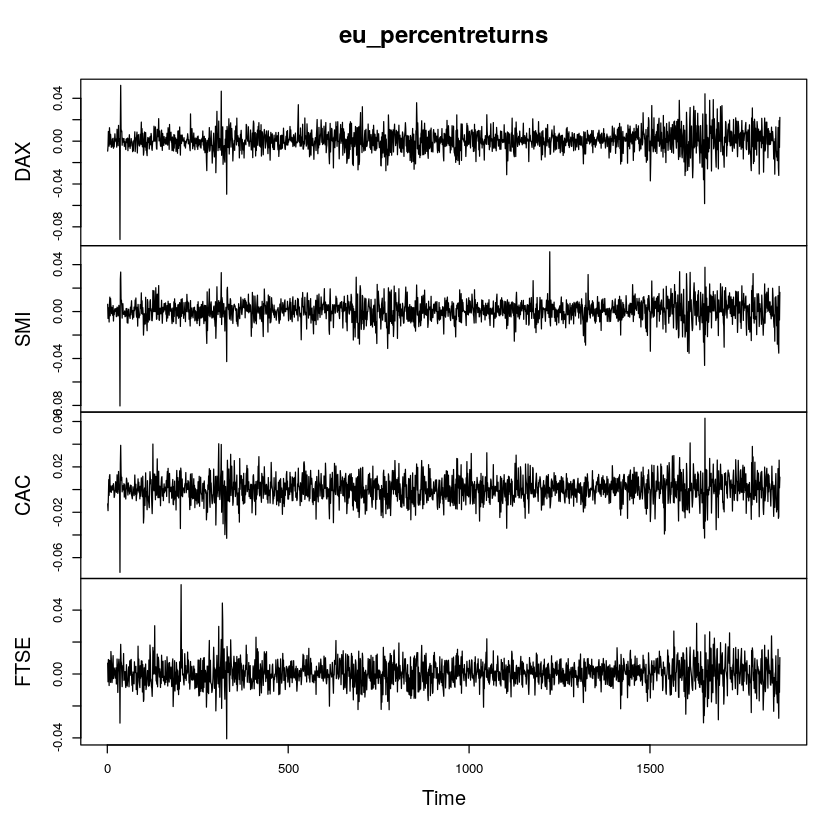

In [25]:
plot(eu_percentreturns)

In [26]:
colMeans(eu_percentreturns)

DAX          SMI          CAC         FTSE 
0.0007052174 0.0008609470 0.0004979471 0.0004637479

In [27]:
apply(eu_percentreturns, MARGIN = 2, FUN = var)

DAX          SMI          CAC         FTSE 
1.056965e-04 8.523711e-05 1.215909e-04 6.344767e-05

In [28]:
apply(eu_percentreturns, MARGIN = 2, FUN = sd)

DAX         SMI         CAC        FTSE 
0.010280879 0.009232394 0.011026827 0.007965405

### Logreturn distributions

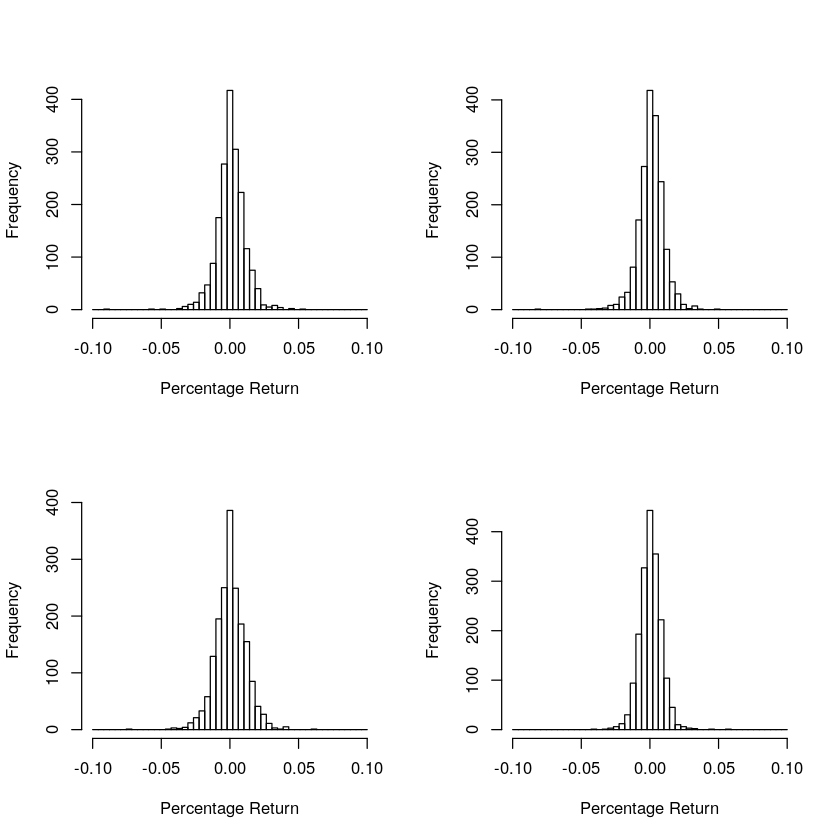

In [29]:
par(mfrow = c(2,2))
hist <- apply(eu_percentreturns, MARGIN = 2, FUN = hist, main = "", breaks=seq(-0.10,0.10,l=50), xlab = "Percentage Return")

### Quantiles

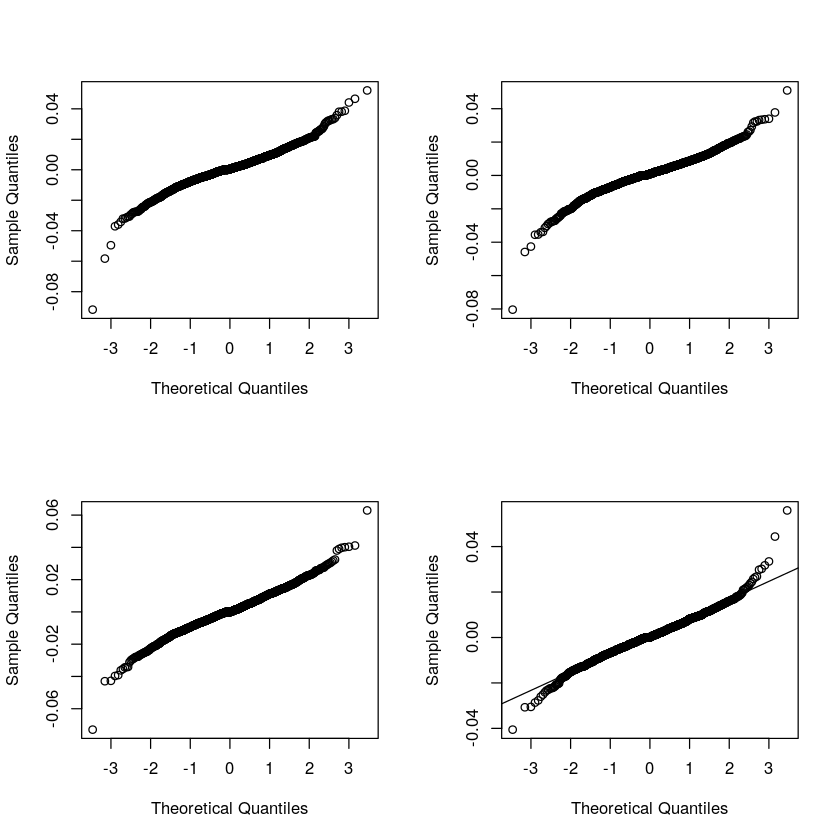

In [30]:
par(mfrow = c(2,2))
quantiles <- apply(eu_percentreturns, MARGIN = 2, FUN = qqnorm, main = "")
qqline(eu_percentreturns)